In [3]:
import pandas as pd
from IPython.display import display, HTML

df = (pd
    .read_excel('data/tiktok-q3-2022.xlsx', sheet_name='Historical video removals')
    .rename(columns={
        'Date': 'Quarter',
        'Total videos removed': 'Removed',
        'Videos removed by automation': 'Autoremoved',
        'Videos restored': 'Restored',
    })
    .assign(Quarter=lambda df: df['Quarter'].astype('period[Q]'))
    .assign(Autoremoved_pct=lambda df: df['Autoremoved'] / df['Removed'] * 100)
    .set_index('Quarter')
)

assert str(df.index.dtype) == 'period[Q-DEC]'
assert str(df.dtypes['Removed']) == 'int64'
assert str(df.dtypes['Autoremoved']) == 'int64'
assert str(df.dtypes['Restored']) == 'int64'
assert str(df.dtypes['Autoremoved_pct']) == 'float64'

display(HTML('<h1>TikTok</h1><h2>TikTok: Historical video removals</h2>'))
display(df)

,Removed,Autoremoved,Restored,Autoremoved_pct
Quarter,,,,
2020Q3,43086543,3370913,1315135,7.823587
2020Q4,46112104,4923971,1612146,10.678261
2021Q1,61951327,8832345,2833837,14.256910
2021Q2,81518334,16957950,4663387,20.802621
2021Q3,91445802,31009160,5535378,33.909878
2021Q4,85794222,28389936,4727382,33.090732
2022Q1,102305516,34726592,5025536,33.944007
2022Q2,113809300,48011571,5896218,42.185982
2022Q3,110954663,53287839,6937997,48.026678


<AxesSubplot: xlabel='Quarter'>

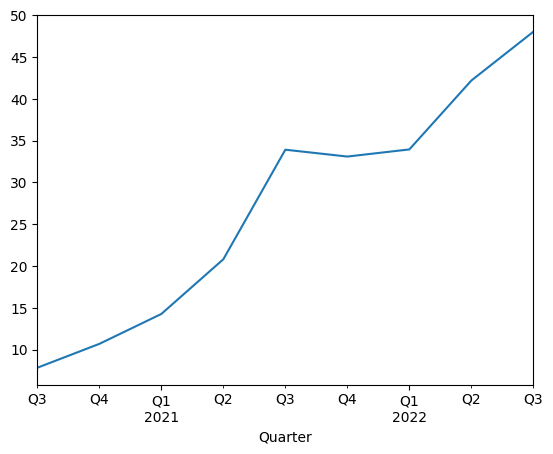

In [4]:
display(HTML('<h2>TikTok: Fraction of Automatically Removed Videos in %</h2>'))
df['Autoremoved_pct'].plot()